In [1]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'

som_model = get_yolo_model(model_path='weights/icon_detect/best.pt')
som_model.to(device)
print('model to {}'.format(device))

model to cuda


In [13]:
# two choices for caption model: fine-tuned blip2 or florence2

caption_model_processor = get_caption_model_processor(model_name="blip2", model_name_or_path="weights/icon_caption_blip2", device=device)
# caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)



Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]


In [3]:
som_model.device, type(som_model) 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [17]:

cnt = 0
image_path = 'imgs/google_page.png'
# image_path = 'imgs/windows_home.png'
image_path = 'imgs/windows_multitab.png'
image_path = 'imgs/omni3.jpg'


image = Image.open(image_path)
image_rgb = image.convert('RGB')
print('image size:', image.size)

box_overlay_ratio = image.size[0] / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}
BOX_TRESHOLD = 0.03

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=False)
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.1)




image size: (1024, 768)

image 1/1 /home/yadonglu/OmniParser/imgs/omni3.jpg: 480x640 160 0s, 5.3ms
Speed: 1.8ms preprocess, 5.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


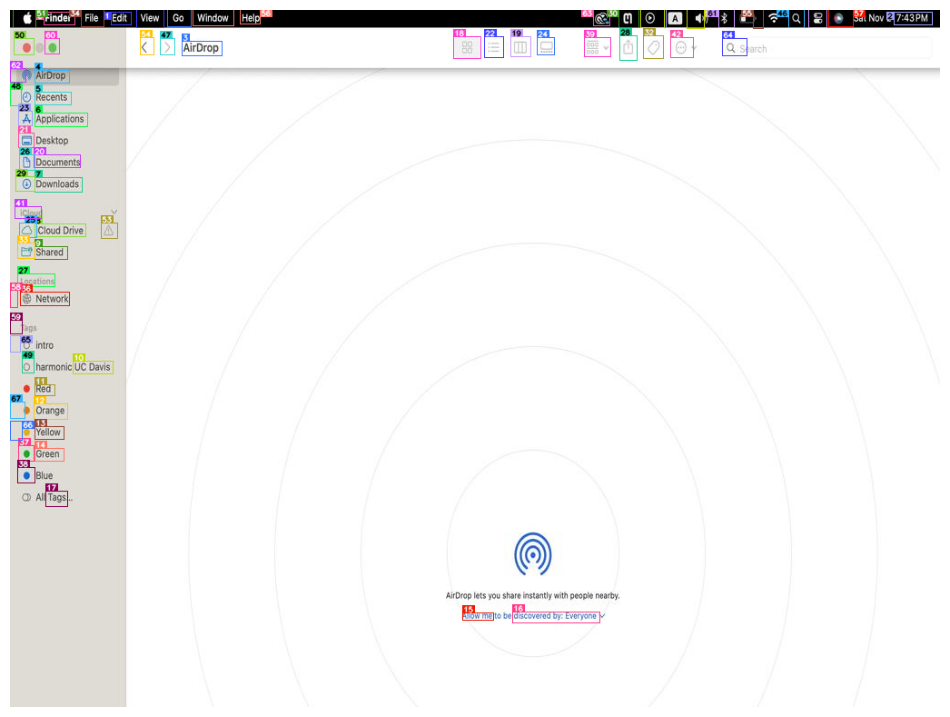

In [18]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)


In [19]:
# print(label_coordinates)
parsed_content_list

['Text Box ID 0: Finder',
 'Text Box ID 1: Edit',
 'Text Box ID 2: 7.43PM',
 'Text Box ID 3: AirDrop',
 'Text Box ID 4: AirDrop',
 'Text Box ID 5: Recents',
 'Text Box ID 6: Applications',
 'Text Box ID 7: Downloads',
 'Text Box ID 8: ICloud Drive',
 'Text Box ID 9: Shared',
 'Text Box ID 10: UC Davis',
 'Text Box ID 11: Red',
 'Text Box ID 12: Orange',
 'Text Box ID 13: Yellow',
 'Text Box ID 14: Green',
 'Text Box ID 15: Hiow Me',
 'Text Box ID 16: discoverod bY: Evortono',
 'Text Box ID 17: Tags _',
 'Icon Box ID 18: a grid of squares.',
 'Icon Box ID 19: a three-column layout.',
 'Icon Box ID 20: a list of documents.',
 'Icon Box ID 21: a browser or web browser.',
 'Icon Box ID 22: a list of options or options.',
 'Icon Box ID 23: an arrow pointing to the left.',
 'Icon Box ID 24: a monitor or television screen.',
 'Icon Box ID 25: a cloud or cloud-related feature.',
 'Icon Box ID 26: a document or file.',
 'Icon Box ID 27: a list of locations.',
 'Icon Box ID 28: a loading or buff

745.1158 0.0 19.692017 21.1491


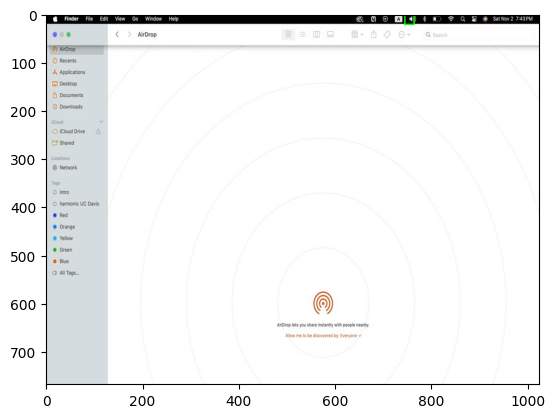

In [25]:
x, y, w, h = label_coordinates['52']
print(x, y, w, h)

import cv2
import matplotlib.pyplot as plt
# draw the bounding box

image = cv2.imread(image_path)
# image = cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (0, 255, 0), 2)
image = cv2.rectangle(image, (int(x), int(y)), (int(x) + int(w), int(y) + int(h)), (0, 255, 0), 2)

plt.imshow(image)